## SBA Loans - Correlating State Income and Inflation

In [1]:
#Setup Notebook
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import CSV

#use 'SBAnational.csv' for full table

SBA_Loan = pd.read_csv('mini_SBA_data.csv', low_memory=False)

In [3]:
SBA_Loan['ApprovalFY'].max()

'2014'

In [4]:
#import state income dataframe
#import state codes

state_income = pd.read_csv('state_income_clean.csv', low_memory=False)
state_code = pd.read_csv('state_codes.csv', low_memory=False)

In [5]:
state_income.head()

,State,Date,Income,Factored Mean Income
0,United States,2018,63179,1.000000
1,Alabama,2018,49936,0.790389
2,Alaska,2018,68734,1.087925
3,Arizona,2018,62283,0.985818
4,Arkansas,2018,49781,0.787936


In [6]:
state_code.head()

,Name,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [7]:
#process state income and codes and add to existing SBA_Loans DF

def process_state_income(income_DF, states_DF,):
    income_DF = income_DF.rename(columns = {'State' : 'Name'})
    states_income = pd.merge(income_DF, states_DF, on = 'Name').rename(
        columns = {'Code' : 'State', 
                   'Date' : 'ApprovalFY', 
                   'Income' : 'Average_State_Income'
                  }).drop('Name', 1)
    states_income['ApprovalFY'] = states_income['ApprovalFY'].astype(str)
    
    return states_income
    
   

In [8]:
state_income_code = process_state_income(state_income, state_code)

In [9]:
 state_income_code

,ApprovalFY,Average_State_Income,Factored Mean Income,State
0,2018,49936,0.790389,AL
1,2017,51113,0.832839,AL
2,2016,47221,0.799827,AL
3,2015,44509,0.787547,AL
4,2014,42278,0.787931,AL
...,...,...,...,...
1745,1988,26419,0.970395,WY
1746,1987,27590,1.058670,WY
1747,1986,23559,0.946259,WY
1748,1985,22081,0.934923,WY


### Total Average Income by Year (US)

In [10]:
year_average = state_income_code.groupby(['ApprovalFY']).mean().drop(columns = 'Factored Mean Income')

In [11]:
year_average.head()

,Average_State_Income
ApprovalFY,
1984,22441.04
1985,23215.26
1986,24333.88
1987,25617.94
1988,26835.22


### Total Average Income by State

In [12]:
state_average = state_income_code.groupby(['State']).mean().sort_values(by = 'Average_State_Income',
                                                                            ascending=False)

state_average.head()

,Average_State_Income,Factored Mean Income
State,,
MD,53736.085714,1.291071
AK,52664.800000,1.284984
CT,52585.257143,1.274937
NJ,52420.857143,1.273195
NH,52146.800000,1.247873


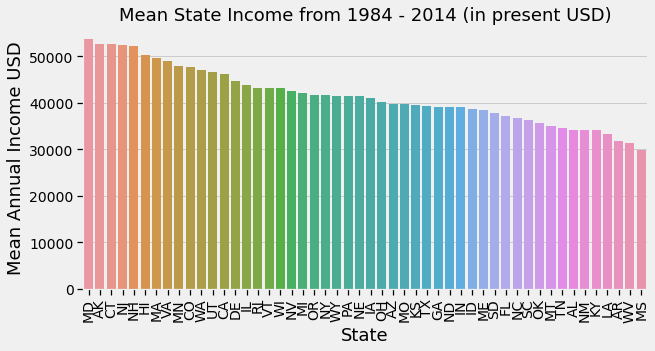

In [13]:
#Find and graph average state

plt.figure(figsize=(9, 4.5))
plt.title('Mean State Income from 1984 - 2014 (in present USD)', fontsize=18)

ax = sns.barplot(x = state_average.index, y = 'Average_State_Income', data=state_average)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('State', fontsize=18)
ax.set_ylabel('Mean Annual Income USD', fontsize=18)

ax.tick_params(axis='x', rotation=90)

plt.show()






We can see that the income varies by state. Perhaps this can correlate to loan approvals. Let's try and map this out geographically with locations of SBA-Backed loans to see if there is a connection indeed

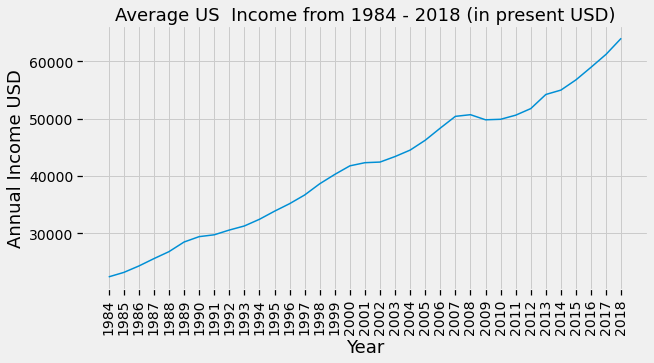

In [14]:

#Find and graph total average income by year 

plt.figure(figsize=(9, 4.5))
plt.title('Average US  Income from 1984 - 2018 (in present USD)', fontsize=18)

ax = sns.lineplot(data=year_average, x = year_average.index, y = 'Average_State_Income')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Annual Income USD', fontsize=18)

ax.tick_params(axis='x', rotation=90)

plt.show()



The value of US income is increasing year on year and therefore may not be the best feature to incorporate into our model


### Map 'ApprovalFY' and 'State' to average state income 

In [15]:
#function to integrate main df to include two columns 'Average_State_Income' and "Factored Mean Income"

def state_income(SBA_df, income_df):
    #where 'SBA_df' is the loan dataframe and 'income_df' is the state income df
    #both dfs should have compatible dtypes
    
    result = pd.merge(SBA_df, income_df, on=["State", "ApprovalFY"])
    
    return result

In [16]:
merged_df = state_income(SBA_Loan, state_income_code)

In [17]:
merged_df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Average_State_Income,Factored Mean Income
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$17,400.00",32039,0.940222
1,7961403002,RAMADA INN,SHERMAN,TX,75090,SUNFLOWER BANK NATL ASSOC,KS,0,5-Jan-95,1995,...,NaN,30-Apr-95,"$931,000.00",$0.00,P I F,$0.00,"$931,000.00","$698,250.00",32039,0.940222
2,8673183008,APPLE BEE LEARNING CNETER CORP,LAREDO,TX,78041,INTERNATIONAL BANK OF COMMERCE,TX,0,25-Sep-95,1995,...,NaN,31-May-98,"$165,000.00",$0.00,P I F,$0.00,"$165,000.00","$123,750.00",32039,0.940222
3,8673123001,SHIGEMOTO & ANNETT II INC,ELGIN,TX,78621,CEN-TEX CERT. DEVEL CORP,TX,332996,25-Sep-95,1995,...,NaN,14-May-97,"$935,000.00",$0.00,P I F,$0.00,"$935,000.00","$935,000.00",32039,0.940222
4,8306583008,LAKE COUNTRY PIZZA,GRAHAM,TX,76450,CIERA BANK,TX,0,2-May-95,1995,...,NaN,31-Jul-95,"$25,300.00",$0.00,P I F,$0.00,"$25,300.00","$22,770.00",32039,0.940222


## Monthly Inflation Rates in the US

Let's explore the impact of the monthly inflation rates between 1984 and 2014 on SBA-backed loans. We will use the Bureau of Labour Statistics inflation rates by month

In [18]:
monthly_inflation = pd.read_csv(
    'Monthly_Inflation_raw.csv')

In [19]:
monthly_inflation.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,1.58%,1.13%,1.51%,1.95%,2.13%,2.07%,1.99%,1.70%,1.66%,1.66%,1.32%,0.76%
1,2013,1.60%,1.98%,1.47%,1.06%,1.36%,1.75%,1.96%,1.52%,1.19%,0.96%,1.24%,1.50%
2,2012,2.93%,2.87%,2.65%,2.30%,1.70%,1.66%,1.41%,1.69%,1.99%,2.16%,1.76%,1.74%
3,2011,1.63%,2.11%,2.68%,3.16%,3.57%,3.56%,3.63%,3.77%,3.87%,3.53%,3.39%,2.96%
4,2010,2.63%,2.14%,2.31%,2.24%,2.02%,1.05%,1.24%,1.15%,1.14%,1.17%,1.14%,1.50%


In [20]:
# melt grid into month, year and inflation rate by percent

monthly_inflation = monthly_inflation.melt(id_vars=["Year"], 
        var_name="Month", 
        value_name="Inflation")

monthly_inflation = monthly_inflation.rename(
        columns = {'Year' : 'ApprovalFY',
                  })
monthly_inflation


,ApprovalFY,Month,Inflation
0,2014,Jan,1.58%
1,2013,Jan,1.60%
2,2012,Jan,2.93%
3,2011,Jan,1.63%
4,2010,Jan,2.63%
...,...,...,...
367,1988,Dec,4.42%
368,1987,Dec,4.43%
369,1986,Dec,1.10%
370,1985,Dec,3.80%


In [21]:
SBA_Loan = pd.read_csv('mini_SBA_data.csv', low_memory=False)

In [22]:
#function to import inflation rate by month

def annual_inflation(SBA_df, inflation_df):
    #where 'SBA_df' is the loan dataframe and 'income_df' is the state income df
    #both dfs should have compatible dtypes
    
    
    SBA_df['Month'] = pd.DatetimeIndex(SBA_df['ApprovalDate']).month.astype(str)
    SBA_df['Month'] = SBA_df['Month'].apply(lambda x: datetime.datetime.strptime(x, "%m").strftime("%b"))
    
    inflation_df['ApprovalFY'] = inflation_df['ApprovalFY'].astype(str)
    
    result = pd.merge(SBA_df, inflation_df, on=["ApprovalFY", "Month"])
    
    return result

In [23]:
SBA_Loan_inflation = annual_inflation(SBA_Loan, monthly_inflation)

SBA_Loan_inflation.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Month,Inflation
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$17,400.00",Mar,2.85%
1,8190873009,SCOTTISH TOOL DIE,CLEVELAND,OH,44113,NATL BK & TR CO,OH,0,21-Mar-95,1995,...,NaN,30-Apr-95,"$288,000.00",$0.00,P I F,$0.00,"$288,000.00","$201,600.00",Mar,2.85%
2,8218803002,MASTER CHO'S TAE KWON DO SCHOO,FRESNO,CA,93710,LOANS FROM OLD CLOSED LENDERS,DC,0,30-Mar-95,1995,...,NaN,30-Apr-95,"$478,000.00",$0.00,P I F,$0.00,"$478,000.00","$358,500.00",Mar,2.85%
3,8159393009,LAW OFFICES OF KLAUS O. SNYDER,SUMNER,WA,98390,SMALL BUSINESS ADMINSITRATION,DC,541110,9-Mar-95,1995,...,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$18,000.00",Mar,2.85%
4,8210733000,"TRAINING PLUS, INC.",GRAND RAPIDS,MI,49508,UNITED BANK OF MICHIGAN,MI,0,28-Mar-95,1995,...,NaN,30-Apr-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$45,000.00",Mar,2.85%


## Graph inflation and SBA-backed loan approval rates

In [24]:
monthly_inflation = monthly_inflation.rename(columns = { 'ApprovalFY' : 'Year'})

monthly_inflation['Month'] = monthly_inflation['Month'].apply(lambda x: datetime.datetime.strptime(x, "%b").strftime("%m"))

monthly_inflation

,Year,Month,Inflation
0,2014,01,1.58%
1,2013,01,1.60%
2,2012,01,2.93%
3,2011,01,1.63%
4,2010,01,2.63%
...,...,...,...
367,1988,12,4.42%
368,1987,12,4.43%
369,1986,12,1.10%
370,1985,12,3.80%


In [25]:
monthly_inflation['Date'] = pd.to_datetime(monthly_inflation[['Year', 'Month']].assign(DAY=1))

In [26]:
monthly_inflation.head()

,Year,Month,Inflation,Date
0,2014,01,1.58%,2014-01-01
1,2013,01,1.60%,2013-01-01
2,2012,01,2.93%,2012-01-01
3,2011,01,1.63%,2011-01-01
4,2010,01,2.63%,2010-01-01


In [27]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '')
    return x

def clean_pc(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return x.replace('%', '').replace(',', '')
    return x

In [28]:
SBA_Loan_inflation['GrAppv'] = SBA_Loan_inflation['GrAppv'].apply(clean_currency).astype('float')
SBA_Loan_inflation['SBA_Appv'] = SBA_Loan_inflation['SBA_Appv'].apply(clean_currency).astype('float')
SBA_Loan_inflation['Inflation'] = SBA_Loan_inflation['Inflation'].apply(clean_pc).astype('float')

SBA_Loan_inflation['SBA_backed_portion'] = SBA_Loan_inflation['SBA_Appv']/SBA_Loan_inflation['GrAppv']
SBA_Loan_inflation

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Month,Inflation,SBA_backed_portion
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,20000.0,17400.0,Mar,2.85,0.87
1,8190873009,SCOTTISH TOOL DIE,CLEVELAND,OH,44113,NATL BK & TR CO,OH,0,21-Mar-95,1995,...,30-Apr-95,"$288,000.00",$0.00,P I F,$0.00,288000.0,201600.0,Mar,2.85,0.70
2,8218803002,MASTER CHO'S TAE KWON DO SCHOO,FRESNO,CA,93710,LOANS FROM OLD CLOSED LENDERS,DC,0,30-Mar-95,1995,...,30-Apr-95,"$478,000.00",$0.00,P I F,$0.00,478000.0,358500.0,Mar,2.85,0.75
3,8159393009,LAW OFFICES OF KLAUS O. SNYDER,SUMNER,WA,98390,SMALL BUSINESS ADMINSITRATION,DC,541110,9-Mar-95,1995,...,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,20000.0,18000.0,Mar,2.85,0.90
4,8210733000,"TRAINING PLUS, INC.",GRAND RAPIDS,MI,49508,UNITED BANK OF MICHIGAN,MI,0,28-Mar-95,1995,...,30-Apr-95,"$50,000.00",$0.00,P I F,$0.00,50000.0,45000.0,Mar,2.85,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44746,6688765001,PUMP & SEALING TECHNOLOGY INC,SCHERERVILLE,IN,46375,PEOPLES BANK SB,IN,811310,21-Feb-14,2014,...,21-Feb-14,"$14,000.00",$0.00,P I F,$0.00,10000.0,5000.0,Feb,1.13,0.50
44747,6415375007,"Flavorus, Inc. dba: Groove Tic",Los Angeles,CA,90065,HANMI BANK,CA,454111,9-Sep-13,2013,...,12-Sep-13,"$150,000.00",$0.00,P I F,$0.00,150000.0,127500.0,Sep,1.19,0.85
44748,6411535010,The Max Construction Group LLC,CINCINNATI,OH,45214,CENTERBANK,OH,236220,6-Sep-13,2013,...,6-Sep-13,"$100,000.00",$0.00,P I F,$0.00,100000.0,50000.0,Sep,1.19,0.50
44749,6418135000,"Premium Concrete, Inc.",Schaumburg,IL,60193,FIRST AMERICAN BANK,IL,238110,11-Sep-13,2013,...,11-Sep-13,"$300,000.00",$0.00,P I F,$0.00,250000.0,187500.0,Sep,1.19,0.75


In [29]:
grouped_by_month = SBA_Loan_inflation.groupby(['ApprovalFY']).agg('mean').reset_index()
grouped_by_month = grouped_by_month[['SBA_backed_portion','ApprovalFY','Inflation']]
grouped_by_month['SBA_backed_portion'] = grouped_by_month['SBA_backed_portion']*100

grouped_by_month

,SBA_backed_portion,ApprovalFY,Inflation
0,95.175294,1984,4.341294
1,94.974125,1985,3.578969
2,92.790100,1986,1.804800
3,93.224176,1987,3.856703
4,91.626732,1988,4.063069
5,84.079109,1989,4.855545
6,86.124887,1990,5.386511
7,85.716149,1991,4.277100
8,85.099854,1992,3.040273
9,84.999833,1993,2.925710


In [30]:
grouped_by_month['ApprovalFY'] = pd.to_datetime(grouped_by_month['ApprovalFY'], format = '%Y')

In [31]:
#inflation_year = inflation_year[((inflation_year['ApprovalFY'] > 1983) & (inflation_year['ApprovalFY'] <= 2015))]

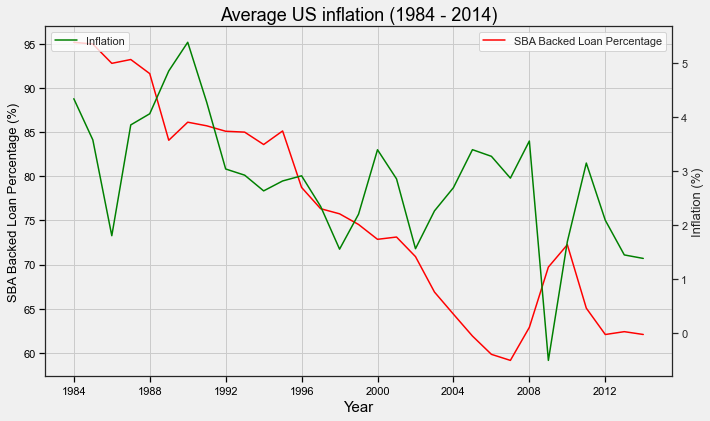

In [32]:
plt.figure(figsize=(10, 6))
plt.title('Average US inflation (1984 - 2014)', fontsize=18)

#plot inflation by year 

sns.set_style(style = 'white')

ax2 = sns.lineplot(data=grouped_by_month, x = 'ApprovalFY', y = 'SBA_backed_portion',color="r", label = 'SBA Backed Loan Percentage')
ax2.set_ylabel('SBA Backed Loan Percentage (%)',fontsize=13)
ax2.set_xlabel('Year',fontsize=15)


ax2 = plt.twinx()
ax1 = sns.lineplot(data=grouped_by_month, x = 'ApprovalFY', y = 'Inflation', color="g", ax=ax2 , label = 'Inflation')
ax2.set_ylabel('Inflation (%)',fontsize=13)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.show()


## Factored Annual Income 

In [33]:
income_SBA = merged_df
income_SBA


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Average_State_Income,Factored Mean Income
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,NaN,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,"$20,000.00","$17,400.00",32039,0.940222
1,7961403002,RAMADA INN,SHERMAN,TX,75090,SUNFLOWER BANK NATL ASSOC,KS,0,5-Jan-95,1995,...,NaN,30-Apr-95,"$931,000.00",$0.00,P I F,$0.00,"$931,000.00","$698,250.00",32039,0.940222
2,8673183008,APPLE BEE LEARNING CNETER CORP,LAREDO,TX,78041,INTERNATIONAL BANK OF COMMERCE,TX,0,25-Sep-95,1995,...,NaN,31-May-98,"$165,000.00",$0.00,P I F,$0.00,"$165,000.00","$123,750.00",32039,0.940222
3,8673123001,SHIGEMOTO & ANNETT II INC,ELGIN,TX,78621,CEN-TEX CERT. DEVEL CORP,TX,332996,25-Sep-95,1995,...,NaN,14-May-97,"$935,000.00",$0.00,P I F,$0.00,"$935,000.00","$935,000.00",32039,0.940222
4,8306583008,LAKE COUNTRY PIZZA,GRAHAM,TX,76450,CIERA BANK,TX,0,2-May-95,1995,...,NaN,31-Jul-95,"$25,300.00",$0.00,P I F,$0.00,"$25,300.00","$22,770.00",32039,0.940222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44667,2688693003,FELTS' PARTS & SERVICE,WALNUT RIDGE,AR,72476,IBERIABANK,AR,0,6-Aug-86,1986,...,21-Feb-89,15-Sep-86,"$75,000.00",$0.00,CHGOFF,"$75,560.00","$75,000.00","$63,750.00",18730,0.752299
44668,6594935003,All Things Lovely,OREM,UT,84057,CENTRAL BANK,UT,454111,18-Dec-13,2014,...,NaN,18-Dec-13,"$25,900.00",$0.00,P I F,$0.00,"$25,900.00","$12,950.00",63383,1.181262
44669,1728483000,GENERAL FIBERGLASS,MADISON,WI,53707,WISCONSIN BUS. DEVEL FINAN COR,WI,0,25-Oct-83,1984,...,NaN,10-Apr-85,"$317,000.00",$0.00,P I F,$0.00,"$317,000.00","$317,000.00",20743,0.925407
44670,5621715009,Mattila Marketing Group LLC,MINNEAPOLIS,MN,55416,U.S. BANK NATIONAL ASSOCIATION,OH,541613,7-Dec-12,2013,...,NaN,7-Dec-12,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00",64324,1.200411


In [34]:
income_SBA['GrAppv'] = income_SBA['GrAppv'].apply(clean_currency).astype('float')
income_SBA['SBA_Appv'] = income_SBA['SBA_Appv'].apply(clean_currency).astype('float')
income_SBA['Average_State_Income'] = income_SBA['Average_State_Income'].apply(clean_currency).astype('float')
income_SBA['Factored Mean Income'] = income_SBA['Factored Mean Income'].apply(clean_currency).astype('float')

income_SBA['SBA_backed_portion'] = income_SBA['SBA_Appv']/income_SBA['GrAppv']
income_SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Average_State_Income,Factored Mean Income,SBA_backed_portion
0,8176773007,RAFAEL'S RESTAURANT,EDINBURG,TX,78539,TEXAS ST. BANK A DIVISION OF,TX,0,16-Mar-95,1995,...,30-Apr-95,"$20,000.00",$0.00,P I F,$0.00,20000.0,17400.0,32039.0,0.940222,0.87
1,7961403002,RAMADA INN,SHERMAN,TX,75090,SUNFLOWER BANK NATL ASSOC,KS,0,5-Jan-95,1995,...,30-Apr-95,"$931,000.00",$0.00,P I F,$0.00,931000.0,698250.0,32039.0,0.940222,0.75
2,8673183008,APPLE BEE LEARNING CNETER CORP,LAREDO,TX,78041,INTERNATIONAL BANK OF COMMERCE,TX,0,25-Sep-95,1995,...,31-May-98,"$165,000.00",$0.00,P I F,$0.00,165000.0,123750.0,32039.0,0.940222,0.75
3,8673123001,SHIGEMOTO & ANNETT II INC,ELGIN,TX,78621,CEN-TEX CERT. DEVEL CORP,TX,332996,25-Sep-95,1995,...,14-May-97,"$935,000.00",$0.00,P I F,$0.00,935000.0,935000.0,32039.0,0.940222,1.00
4,8306583008,LAKE COUNTRY PIZZA,GRAHAM,TX,76450,CIERA BANK,TX,0,2-May-95,1995,...,31-Jul-95,"$25,300.00",$0.00,P I F,$0.00,25300.0,22770.0,32039.0,0.940222,0.90


In [35]:


income_SBA_by_year = income_SBA.groupby(['ApprovalFY']).agg('mean').reset_index()
income_SBA_by_year = income_SBA_by_year[['SBA_backed_portion','ApprovalFY','Average_State_Income', 'Factored Mean Income']]
income_SBA_by_year['SBA_backed_portion'] = income_SBA_by_year['SBA_backed_portion']*100

income_SBA_by_year.head()

,SBA_backed_portion,ApprovalFY,Average_State_Income,Factored Mean Income
0,95.175294,1984,22600.529412,1.008277
1,94.974125,1985,24623.154639,1.042559
2,92.790100,1986,24894.550000,0.999902
3,93.224176,1987,25969.868132,0.996503
4,91.626732,1988,27202.326733,0.999167


In [36]:
income_SBA_by_year['ApprovalFY'] = pd.to_datetime(income_SBA_by_year['ApprovalFY'], format = '%Y')

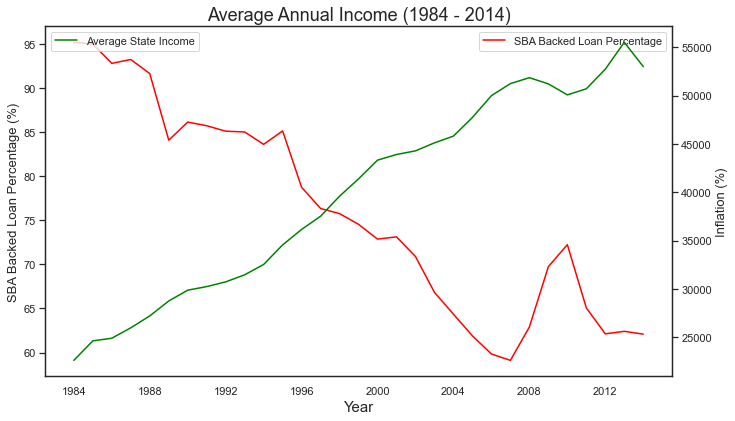

In [37]:
plt.figure(figsize=(10, 6))
plt.title('Average Annual Income (1984 - 2014)', fontsize=18)

#plot inflation by year 

sns.set_style(style = 'white')

ax2 = sns.lineplot(data=income_SBA_by_year, x = 'ApprovalFY', y = 'SBA_backed_portion',color="r", label = 'SBA Backed Loan Percentage')
ax2.set_ylabel('SBA Backed Loan Percentage (%)',fontsize=13)
ax2.set_xlabel('Year',fontsize=15)


ax2 = plt.twinx()
ax1 = sns.lineplot(data=income_SBA_by_year, x = 'ApprovalFY', y = 'Average_State_Income', color="g", ax=ax2 , label = 'Average State Income')
ax2.set_ylabel('Inflation (%)',fontsize=13)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.show()


In [38]:
def annual_inflation(SBA_df, inflation_df):
    #where 'SBA_df' is the loan dataframe and 'income_df' is the state income df
    #both dfs should have compatible dtypes
    inflation_df['ApprovalFY'] = inflation_df['ApprovalFY'].astype(str)
    result = pd.merge(SBA_df, inflation_df, on=["ApprovalFY"])
    
    return result

In [29]:
merged_inflation = annual_inflation(merged_df, inflation_year).dropna()

In [30]:
merged_inflation['ApprovalFY'] = merged_inflation['ApprovalFY'].astype(int)

In [ ]:
SBA_Loan = pd.read_csv('mini_SBA_data.csv', low_memory=False)

In [31]:
#merged_inflation['Zip'] = merged_inflation['Zip'].apply(lambda x : int(str(x)[:3]))

In [32]:
merged_inflation_2008 = merged_inflation[merged_inflation['ApprovalFY'] == 2008]

In [255]:
merged_inflation_2008

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Average_State_Income,inflation,Default
28848,3126996001,BORGES CONSULTING GROUP INC,ELIZABETH,NJ,7202,"MILLENNIUM BCPBANK, N.A.",NJ,541810,11-Jan-08,2008,...,30-Apr-09,"$150,000.00",$0.00,CHGOFF,"$68,148.00","$150,000.00","$75,000.00",65306,3.8391,1
28849,3064975003,"SamKang USA, Inc.",PALISADES PARK,NJ,7650,JPMORGAN CHASE BANK NATL ASSOC,IL,315999,25-Apr-08,2008,...,31-May-08,"$50,100.00",$0.00,CHGOFF,"$24,888.00","$25,000.00","$12,500.00",65306,3.8391,1
28850,3012685008,"Current Waves, Inc",LONG BRANCH,NJ,7740,BBCN BANK,CA,812113,21-Mar-08,2008,...,31-Mar-08,"$50,000.00",$0.00,CHGOFF,"$44,503.00","$50,000.00","$42,500.00",65306,3.8391,1
28854,2918525008,"ILS TENAFLY, LLC",TENAFLY,NJ,7670,WILSHIRE BANK,CA,812112,23-Jan-08,2008,...,29-Feb-08,"$185,000.00",$0.00,CHGOFF,"$178,917.00","$185,000.00","$138,750.00",65306,3.8391,1
28855,3286126008,E-PLANT DENTAL P.C.,PALISADES PARK,NJ,7650,WILSHIRE BANK,CA,621210,18-Jun-08,2008,...,30-Nov-08,"$200,000.00",$0.00,CHGOFF,"$159,832.00","$200,000.00","$100,000.00",65306,3.8391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30828,3120746006,INTERDESIGN ARCHITECTS LLC,ESSEX (CENSUS NAME FOR ESSEX C,CT,6426,LIBERTY BANK,CT,541310,8-Jan-08,2008,...,30-Apr-08,"$82,886.00",$0.00,CHGOFF,"$31,119.00","$35,000.00","$17,500.00",64682,3.8391,1
30831,3041476010,Baba of East Hartford LLC,EAST HARTFORD (TOWN OF),CT,6108,BANCO POPULAR NORTH AMERICA,NY,722110,26-Oct-07,2008,...,31-Oct-07,"$507,500.00",$0.00,CHGOFF,"$360,884.00","$507,500.00","$380,625.00",64682,3.8391,1
30832,3401766008,CBI ACQUISITION CORPORATION,IVORYTON,CT,6442,FARMINGTON BANK,CT,721110,25-Aug-08,2008,...,31-Dec-08,"$1,340,000.00",$0.00,CHGOFF,"$1,338,512.00","$1,340,000.00","$1,005,000.00",64682,3.8391,1
30833,3025355002,"CREATIVE D. BUILDERS, LLC",ESSEX,CT,6426,CAPITAL ONE NATL ASSOC,VA,236118,31-Mar-08,2008,...,31-Aug-08,"$38,757.00",$0.00,CHGOFF,"$25,000.00","$25,000.00","$12,500.00",64682,3.8391,1


In [94]:
merged_inflation_2008['Default'] = np.where(merged_inflation_2008['MIS_Status'] == 'CHGOFF', 1, 0)

In [96]:
merged_inflation_2008['Default'].value_counts()

1    810
0     20
Name: Default, dtype: int64